In [2]:
# open this jupyter notebook with Datalore
import torch
import numpy as np

## tensor初始化
pytorch的数据以tensor的方式储存。可以通过list和tuple等python内部数据结构直接生成tensor，也可以从numpy ndarray来生成。

In [3]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

np_array = np.array(data)
x_np = torch.tensor(np_array)

In [4]:
x_ones = torch.ones_like(x_data)
print(f"ones tensor:\n {x_ones}\n")

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"random tensor:\n {x_rand}\n")

ones tensor:
 tensor([[1, 1],
        [1, 1]])

random tensor:
 tensor([[0.4880, 0.8999],
        [0.8243, 0.7461]])



shape是tuple类型，描述维数，可以指定维数生成tensor

In [5]:
shape = tuple([2, 3])
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(f"random tensor:\n {rand_tensor}\n")
print(f"ones tensor:\n {ones_tensor}\n")
print(f"zeros tensor: \n {zeros_tensor}\n")

random tensor:
 tensor([[0.6115, 0.2113, 0.5655],
        [0.1583, 0.6347, 0.8031]])

ones tensor:
 tensor([[1., 1., 1.],
        [1., 1., 1.]])

zeros tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])



## tensor的属性

In [6]:
tensor = torch.rand((3, 4))
print(f"shape of tensor: {tensor.shape}")
print(f"datatype of tensor: {tensor.dtype}")
print(f"device: tensor is strored on: {tensor.device}")

shape of tensor: torch.Size([3, 4])
datatype of tensor: torch.float32
device: tensor is strored on: cpu


## tensor运算
所有的tensor运算都可以在GPU上运行

In [7]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
print(tensor.device)

cpu


In [8]:
tensor = torch.ones((4, 4))
tensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [9]:
tensor[:, 1] = 0
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [10]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
t1

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])

In [11]:
t2 = torch.cat([tensor, tensor, tensor], dim=0)
t2

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [12]:
# element-wise multiply
print(f"tensor.mul(tensor): \n {tensor.mul(tensor)}")
print(f"tensor*tensor: \n {tensor * tensor}")

tensor.mul(tensor): 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor*tensor: 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [13]:
# matrix multiply
tensor.matmul(tensor)

tensor([[3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]])


## Moving to GPU


In [53]:
if torch.cuda.is_available():
    gpu_rand = torch.rand(2, 2, device='cuda')
    print(gpu_rand)
else:
    print('Sorry, CPU only.')

Sorry, CPU only.


It is important to know that in order to do computation involving two or more tensors, all of the tensors must be on the same device. The following code will throw a runtime error, regardless of whether you have a GPU device available:

In [54]:
x = torch.rand(2, 2)
y = torch.rand(2, 2, device='gpu')
z = x + y  # exception will be thrown

RuntimeError: Expected one of cpu, cuda, ipu, xpu, mkldnn, opengl, opencl, ideep, hip, ve, ort, mps, xla, lazy, vulkan, meta, hpu, privateuseone device type at start of device string: gpu

## Changing the Number of Dimensions
For example, imagine having a model that works on 3 x 226 x 226 images - a 226-pixel square with 3 color channels. When you load and transform it, you’ll get a tensor of shape (3, 226, 226). Your model, though, is expecting input of shape (N, 3, 226, 226), where N is the number of images in the batch. So how do you make a batch of one?

In [55]:
a = torch.rand(3, 226, 226)
b = a.unsqueeze(0)

print(a.shape)
print(b.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


The unsqueeze() method adds a dimension of extent 1. unsqueeze(0) adds it as a new zeroth dimension - now you have a batch of one!

In [56]:
a = torch.rand(1, 20)
print(a.shape)
print(a)

b = a.squeeze(0)
print(b.shape)
print(b)

c = torch.rand(2, 2)
print(c.shape)

d = c.squeeze(0)
print(d.shape)

torch.Size([1, 20])
tensor([[0.1779, 0.4324, 0.6562, 0.5445, 0.8245, 0.9819, 0.2187, 0.9952, 0.3621,
         0.3537, 0.7248, 0.5496, 0.3641, 0.2210, 0.4456, 0.8382, 0.1177, 0.0444,
         0.3134, 0.2687]])
torch.Size([20])
tensor([0.1779, 0.4324, 0.6562, 0.5445, 0.8245, 0.9819, 0.2187, 0.9952, 0.3621,
        0.3537, 0.7248, 0.5496, 0.3641, 0.2210, 0.4456, 0.8382, 0.1177, 0.0444,
        0.3134, 0.2687])
torch.Size([2, 2])
torch.Size([2, 2])


You may only squeeze() dimensions of extent 1. See above where we try to squeeze a dimension of size 2 in c, and get back the same shape we started with. Calls to squeeze() and unsqueeze() can only act on dimensions of extent 1 because to do otherwise would change the number of elements in the tensor.

## torch.autograd的用法
我们从torchvision加载了经过预训练的 resnet18 模型。 我们创建一个随机数据张量来表示具有 3 个通道的单个图像，高度&宽度为 64，其对应的label初始化为一些随机值。

In [14]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)


/Users/dengsiyuan/opt/anaconda3/envs/regular/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/dengsiyuan/opt/anaconda3/envs/regular/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
prediction = model(data) # forward pass
prediction.shape

torch.Size([1, 1000])

用loss.backward()开始反向传播，然后`autograd`会计算梯度，存储在.grad属性中

In [16]:
loss = (prediction - labels).sum()
loss
loss.backward()

In [17]:
# new a optmizer 
optim = torch.optim.SGD(model.parameters(),lr=1e-2, momentum=0.9)
optim.step()

In [18]:
optim

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

## 组建LeNet-5
![markdown image](https://pytorch.apachecn.org/docs/1.7/img/3250cbba812d68265cf7815d987bcd1b.png)

In [19]:
# define a neural network
import torch
import torch.nn as nn
import torch.nn.functional as F  # for the activation function


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # nn.Conv2d为2D卷积核，1 input channel, 6 output channel, 5*5 sqaure convolution
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 全连接层
        self.fc1 = nn.Linear(16*5*5, 120) 
        # 需要注意的是nn.Linear只做仿射变换n affine operation: y = Wx + b
        # 每一个全连接层还有一个激活函数，需要在forward函数中另外添加
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) 

    def forward(self, x):
        x = F.relu(self.conv1(x))
        # maxpooling over a (2,2) window
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(x, (2, 2))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        # flatten all the dimensions except the batch dimension
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


只需要定义forward（）函数，torch自带的autograd就可以自动计算梯度。
模型的参数由net.parameters()返回

In [20]:
params = list(net.parameters())
print(f"length of net.parameters():{len(params)}")
print(params[0].size())  # conv1's .weight

length of net.parameters():10
torch.Size([6, 1, 5, 5])


In [21]:
input_img = torch.randn(1, 32, 32).unsqueeze(0)
"""
torch.nn仅支持小批量。 整个torch.nn包仅支持作为微型样本而不是单个样本的输入。
例如，nn.Conv2d将采用nSamples x nChannels x Height x Width的 4D 张量。
如果您只有一个样本，只需使用input.unsqueeze(0)添加一个假批量尺寸
"""
out = net(input_img)
out

tensor([[-0.0064, -0.1114,  0.0824, -0.0611, -0.0121, -0.1173,  0.0851,  0.1128,
         -0.0630, -0.0120]], grad_fn=<AddmmBackward0>)

In [22]:
target = torch.randn(10)
target = target.view(1, -1)  # make it the same shape as output
target

tensor([[ 0.7867,  1.5801, -0.7273,  0.3674, -0.5328, -1.2552, -0.0536, -0.7251,
         -0.0738,  0.6160]])

In [23]:
criterion = nn.MSELoss()
loss = criterion(target, out)
print(loss)

tensor(0.7011, grad_fn=<MseLossBackward0>)


In [24]:
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([-0.0045,  0.0114,  0.0025,  0.0057, -0.0037,  0.0130])


### 更新权重 torch.optim
`torch.optim`中有梯度下降的各种优化算法,当梯度被`backward`计算出来，就可以调用`.step()`方法跟新权重

In [25]:
import torch.optim as optim

optmizer = optim.SGD(params=net.parameters(), lr=0.01)

# in the training loop
optmizer.zero_grad()
output = net(input_img)
loss = criterion(output,target)
loss.backward()
optmizer.step()

In [26]:
print(net.conv1.bias.grad)

tensor([-0.0045,  0.0114,  0.0025,  0.0057, -0.0037,  0.0130])


## 训练分类器  LeNet-5示例
页面https://pytorch.apachecn.org/#/docs/1.7/06  
https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html

在处理图像文本音频的时候，一般都是把数据先加载为numpy数组，然后再转换为torch.Tensor

- 对于图像，Pillow，OpenCV 等包很有用
- 对于音频，请使用 SciPy 和 librosa 等包
- 对于文本，基于 Python 或 Cython 的原始加载，或者 NLTK 和 SpaCy 很有用

专门针对视觉，我们创建了一个名为`torchvision`的包，其中包含用于常见数据集（例如 Imagenet，CIFAR10，MNIST 等）的数据加载器，以及用于图像（即`torchvision.datasets`和`torch.utils.data.DataLoader`）的数据转换器。

我们将使用CIFAR10，图像尺寸为3 * 32 * 32，有10个类别:
![cifar10](https://pytorch.apachecn.org/docs/1.7/img/ae800707f2489607d51d67499071db16.png)

### 加载CIFAR10


In [27]:

import torchvision
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F  # for the activation function
# torch.nn.fucntion.functional 文档 https://pytorch.org/docs/stable/nn.functional.html
# 包含所有的常用单个函数，注意所有函数名全部小写


transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,  # 在jupyter环境下，光标移动到函数上，按shift+tab可以查看文档
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=4, num_workers=2)
    

Files already downloaded and verified
Files already downloaded and verified


  car  bird  deer  bird


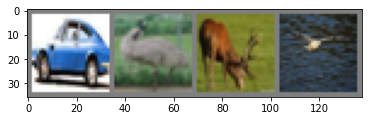

In [28]:

import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html

https://pytorch.org/docs/stable/optim.html

https://pytorch.org/tutorials/recipes/recipes/warmstarting_model_using_parameters_from_a_different_model.html

https://pytorch.apachecn.org/#/docs/1.7/34

https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html#

https://pytorch.apachecn.org/#/docs/1.7/06

In [39]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x= self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x= x.view(-1, 16*5*5)  # view机制可以共享内存
        x = F.relu(self.fc1(x))
        x= F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
net = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=1e-3, momentum =0.9)

In [40]:
epochs=5

for epoch in range(epochs):
    running_loss= 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        optimizer.zero_grad()
        
        preds=net(inputs)
        loss=criterion(preds, labels)
        loss.backward()
        optimizer.step()
        
        
        running_loss += loss.item()
        if i %2000==1999:
            print(f"{epoch+1} {i+1}, running_loss: {running_loss/2000}")
            running_loss=0.0
print("Finish training.")

1 2000, running_loss: 2.2216648833751678
1 4000, running_loss: 1.8768527735769749
1 6000, running_loss: 1.6878215800076724
1 8000, running_loss: 1.5953045188188553
1 10000, running_loss: 1.5239801951795817
1 12000, running_loss: 1.4825703563839197
2 2000, running_loss: 1.4233121374472977
2 4000, running_loss: 1.4008465385623277
2 6000, running_loss: 1.361216522216797
2 8000, running_loss: 1.358315178502351
2 10000, running_loss: 1.29848435613513
2 12000, running_loss: 1.2901876341328025
3 2000, running_loss: 1.2216269699223339
3 4000, running_loss: 1.2285670105419122
3 6000, running_loss: 1.2217217694371938
3 8000, running_loss: 1.204756339982152
3 10000, running_loss: 1.1948361792974174
3 12000, running_loss: 1.1713377057798207
4 2000, running_loss: 1.1018043297864497
4 4000, running_loss: 1.1303810910210013
4 6000, running_loss: 1.1042180329803377
4 8000, running_loss: 1.1267305385619402
4 10000, running_loss: 1.1067567315101623
4 12000, running_loss: 1.0943184613566845
5 2000, runni

In [52]:
correct=0
total=0
with torch.no_grad():
    for data in testloader:
        images, labels=data
        #print(images, labels)
        outputs = net(images)
       # print(outputs)
        _,preds = torch.max(outputs.data, dim=1)
        total += labels.size(0)
        correct += (preds==labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))   

Accuracy of the network on the 10000 test images: 61 %
